# Notebook with example for simulating the Less-than Oracle

In [313]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
import numpy as np

import Oracles as func
from importlib import reload
reload(func)

<module 'Oracles' from '/teamspace/studios/this_studio/MyLessThan/Oracles.py'>

Initial data

In [314]:
number = 8
nqubits = 4

In [315]:
circuit = QuantumCircuit(nqubits)

In [316]:
circuit.h(range(nqubits))

In [317]:
oracle = func.oracle_less_than(number=number, nqubits=nqubits)

In [318]:
circuit.append(oracle, range(nqubits))

Diffuser for Grover's Algorithm

In [319]:
diffuser = QuantumCircuit(nqubits, name=' Diffuser ')

diffuser.h(range(nqubits))
diffuser.x(range(nqubits))
diffuser.append(func.multi_control_z(nqubits), range(nqubits))
diffuser.x(range(nqubits))
diffuser.h(range(nqubits))

In [320]:
circuit.append(diffuser, range(nqubits))

Add measures

In [321]:
circuit.measure_all()

# Draw of Circuits

### By Modules

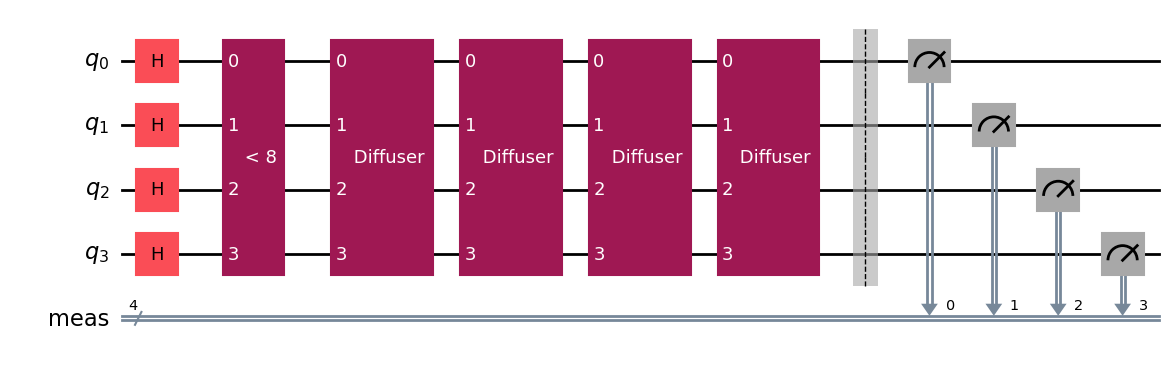

In [322]:
circuit.draw(output='mpl')

### Decomposed

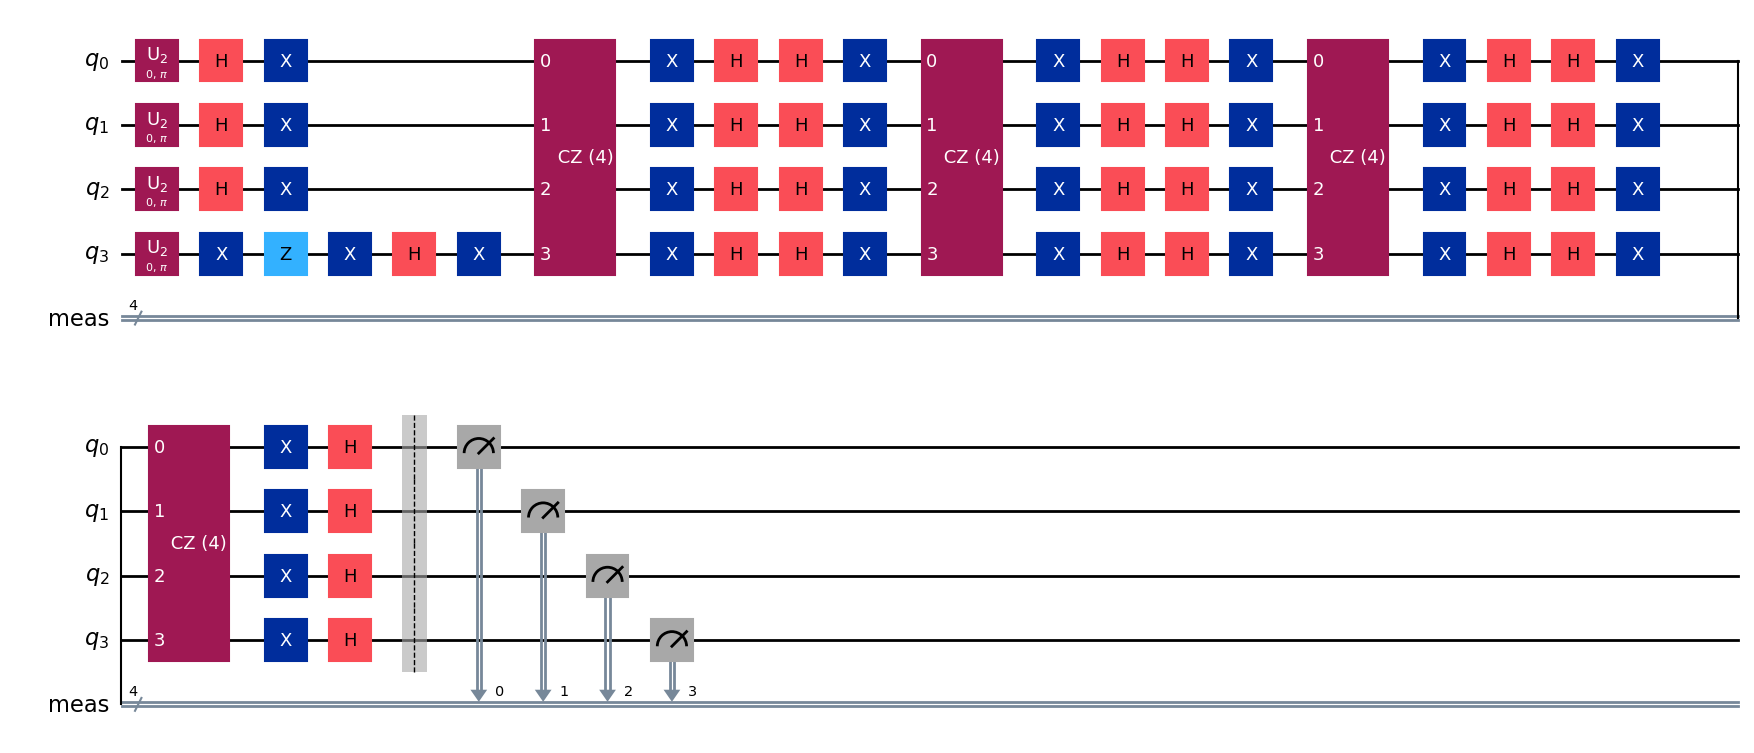

In [323]:
circuit.decompose().draw(output='mpl')

# Simulation of circuit

In [324]:
nshots = 2000

Choose Backend

In [325]:
backend = Aer.get_backend('aer_simulator_statevector')

Transpile and execute circuit

In [326]:
qc_transpiled=transpile(circuit, backend=backend)

In [327]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

Results

In [328]:
result = job.result()

In [329]:
counts = result.get_counts()

sorted_counts = dict(sorted(counts.items(), key=lambda item: int(item[0], 2)))
print("\nMeasurement outcomes:")
for state, count in sorted_counts.items():
    decimal_value = int(state, 2)  # Convert binary string to decimal
    print(f"{decimal_value}:{state} → {count}")


Measurement outcomes:
0:0000 → 116
1:0001 → 113
2:0010 → 129
3:0011 → 129
4:0100 → 142
5:0101 → 126
6:0110 → 127
7:0111 → 104
8:1000 → 143
9:1001 → 138
10:1010 → 125
11:1011 → 125
12:1100 → 127
13:1101 → 135
14:1110 → 102
15:1111 → 119
